In [395]:
# création d'un dataset avec chaque année et chaque variable économique
import import_ipynb
import utils
import numpy as np
# pour 1 evenement 
""" 
data_pop = utils.generate_df_from_files("./data_cleaned/population", "_population")
data_fertility = utils.generate_df_from_files("./data_cleaned/fertility", "_fertility")
data_child = utils.generate_df_from_files("./data_cleaned/child_mortality", "_child_mortality")
data_capita = utils.generate_df_from_files("./data_cleaned/gdp_capita", "_gdp_capita")
#data_life = utils.generate_df_from_files("./data_cleaned/life_expectancy_by_years", "_life_expectancy")
# 11 = dataset de 1992 12 = dataset de 1996 ...
annee = 15
data_pop = data_pop[annee:]
data_fertility = data_fertility[annee:]
data_child = data_child[annee:]
data_capita = data_capita[annee:]

X = np.concatenate((
    data_pop[0].iloc[:, 1:], 
    data_fertility[0].iloc[:,1:], 
    data_child[0].iloc[:,1:], 
    data_capita[0].iloc[:,1:] 
), axis=1)


"""

' \ndata_pop = utils.generate_df_from_files("./data_cleaned/population", "_population")\ndata_fertility = utils.generate_df_from_files("./data_cleaned/fertility", "_fertility")\ndata_child = utils.generate_df_from_files("./data_cleaned/child_mortality", "_child_mortality")\ndata_capita = utils.generate_df_from_files("./data_cleaned/gdp_capita", "_gdp_capita")\n#data_life = utils.generate_df_from_files("./data_cleaned/life_expectancy_by_years", "_life_expectancy")\n# 11 = dataset de 1992 12 = dataset de 1996 ...\nannee = 15\ndata_pop = data_pop[annee:]\ndata_fertility = data_fertility[annee:]\ndata_child = data_child[annee:]\ndata_capita = data_capita[annee:]\n\nX = np.concatenate((\n    data_pop[0].iloc[:, 1:], \n    data_fertility[0].iloc[:,1:], \n    data_child[0].iloc[:,1:], \n    data_capita[0].iloc[:,1:] \n), axis=1)\n\n\n'

In [396]:
# methode pour les 8 evenements de la seconde partie
data_pop = utils.generate_df_from_files("./data_cleaned/population", "_population")
data_fertility = utils.generate_df_from_files("./data_cleaned/fertility", "_fertility")
data_child = utils.generate_df_from_files("./data_cleaned/child_mortality", "_child_mortality")
data_capita = utils.generate_df_from_files("./data_cleaned/gdp_capita", "_gdp_capita")

X_list = []

for annee in range(11, 19):
        
    data_pop_slice = data_pop[annee].iloc[:, :]
    data_fertility_slice = data_fertility[annee].iloc[:, 1:]
    data_child_slice = data_child[annee].iloc[:, 1:]
    data_capita_slice = data_capita[annee].iloc[:, 1:]

    concatenated_data = np.concatenate((
        data_pop_slice, 
        data_fertility_slice, 
        data_child_slice, 
        data_capita_slice
    ), axis=1)

    X_list.append(concatenated_data)

X = np.vstack(X_list)

In [397]:
# création des label pour tous les événements 1992->2020
import pandas as pd
df_delegations = pd.read_csv("./second_part_countries_cleaned_normalized.csv")

labels_list = []
for i in range(len(df_delegations)):
    label = df_delegations.iloc[i, :-1]
    labels_list.append(label)

y = pd.concat(labels_list, axis=0, ignore_index=True)


In [398]:
y.shape

(1304,)

In [399]:
X.shape

(1304, 5)

In [400]:
X[:, 0]

array(['Albania', 'Algeria', 'Andorra', ..., 'Vietnam', 'Zambia',
       'Zimbabwe'], dtype=object)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

country_names = X[:, 0]

X=X[:, 1:]

X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32) 

X_train, X_test, y_train, y_test, country_train, country_test = train_test_split(
    X, y, country_names, test_size=0.2, random_state=42
)
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(10, activation='relu'),
    Dropout(0.4),
    Dense(4, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/150


c:\Users\Julien\miniconda3\envs\PCD\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.2596 - mae: 0.3653 - val_loss: 0.2209 - val_mae: 0.3828
Epoch 2/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1879 - mae: 0.3598 - val_loss: 0.1746 - val_mae: 0.3636
Epoch 3/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1512 - mae: 0.3337 - val_loss: 0.1707 - val_mae: 0.3598
Epoch 4/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1592 - mae: 0.3452 - val_loss: 0.1662 - val_mae: 0.3561
Epoch 5/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1517 - mae: 0.3380 - val_loss: 0.1675 - val_mae: 0.3559
Epoch 6/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1488 - mae: 0.3299 - val_loss: 0.1655 - val_mae: 0.3543
Epoch 7/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1608 - mae: 0.3480 - val_loss: 0.1659 - val_mae: 0.3532
Epoch 8/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1501 - mae: 0.3352 - val_loss: 0.1600 - val_mae: 0.3515
Epoch 9/150
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1459 - mae: 

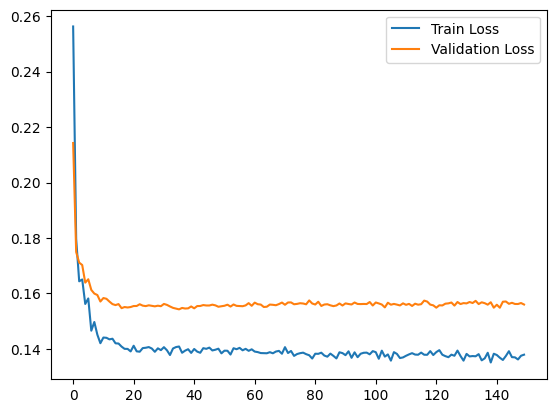

In [ ]:
# plot de history pour voir l'évolution de la loss et de la mae
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
# calcul de la mse
from sklearn.metrics import mean_absolute_error, mean_squared_error
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")



9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Mean Absolute Error: 0.33161746796929703
Mean Squared Error: 0.14195736092940436


In [ ]:
# faire des prédictions avec les pays de test
predictions = model.predict(X_test)

# affichage des prédictions
for i in range(10):
    print(f"Prediction: {predictions[i][0]}, Real: {y_test[i]}", "pays", country_test[i])

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Prediction: 0.42928239703178406, Real: 0.3333333432674408 pays 0.0035313538600065
Prediction: 0.3035091757774353, Real: 0.0 pays 0.0032155473666731
Prediction: 0.4182479977607727, Real: 0.52173912525177 pays 0.0333503967219607
Prediction: 0.32199302315711975, Real: 0.5 pays 0.0100655501278586
Prediction: 0.4475458562374115, Real: 1.0 pays 1.0
Prediction: 0.37393277883529663, Real: 0.5 pays 0.0006603699283286
Prediction: 0.2944428026676178, Real: 0.38461539149284363 pays 0.0221944923398682
Prediction: 0.4228253662586212, Real: 1.0 pays 0.0003075211091812
Prediction: 0.4172830581665039, Real: 0.0 pays 0.0044823986990628
Prediction: 0.3788487911224365, Real: 0.0 pays 0.0028493793273104
